In [23]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from os import walk
import os
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np
from sklearn.metrics import auc
from tensorflow.keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

FileNotFoundError: [Errno 2] No such file or directory: 'FolderFrames/yesPlots/0_12_20chunk740.png'

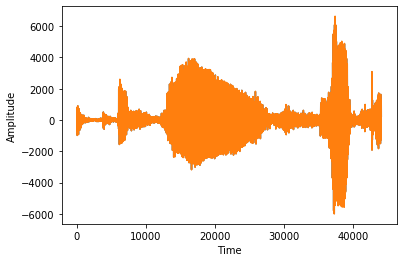

In [24]:
# generate plots for image recognition of sound waves
features = []
pathNoMrsPiggy = './FolderFrames/MrsPiggyAudioTrainingSet/NoMrsPiggy/'
pathYesMrsPiggy = './FolderFrames/MrsPiggyAudioTrainingSet/YesMrsPiggy/'

for filename in os.listdir(pathYesMrsPiggy):
    if filename.endswith(".wav"):
        # read audio samples
        input_data = read(pathYesMrsPiggy + filename)
        audio = input_data[1]
        # plot the first 1024 samples
        plt.plot(audio)
        # label the axes
        plt.ylabel("Amplitude")
        plt.xlabel("Time")
        # set the title
        # plt.title("Sample Wav")
        # display the plot
        plt.savefig("FolderFrames/yesPlots/" + filename.split(".")[0] + '.png')
        # plt.show()
        plt.close('all')
        
for filename in os.listdir(pathNoMrsPiggy):
    if filename.endswith(".wav"):
        # read audio samples
        input_data = read(pathNoMrsPiggy + filename)
        audio = input_data[1]
        # plot the first 1024 samples
        plt.plot(audio)
        # label the axes
        plt.ylabel("Amplitude")
        plt.xlabel("Time")
        # set the title
        # plt.title("Sample Wav")
        # display the plot
        plt.savefig("FolderFrames/noPlots/" + filename.split(".")[0] + '.png')
        # plt.show()
        plt.close('all')


In [25]:
def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = loaded_model.predict(x)
    return list(flatten[0])

In [26]:
# load vgg19 model and load training data and fit the model
base_model = VGG19(weights='imagenet')
loaded_model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

X_train = []
y_train = []

yes_plots = []
for (_,_,filenames) in os.walk('FolderFrames/yesPlotsTrain'):
    yes_plots.extend(filenames)
    break

print("found all yes_plots")
for yplot in yes_plots:
    X_train.append(get_features('FolderFrames/yesPlotsTrain/' + yplot))
    y_train.append(1)
print("appended all yes_plots")

no_plots = []
for (_,_,filenames) in os.walk('FolderFrames/noPlotsTrain'):
    no_plots.extend(filenames)
    break
print("found all no_plots")
for nplot in no_plots:
    X_train.append(get_features('FolderFrames/noPlotsTrain/' + nplot))
    y_train.append(0)
print("appended all no_plots")
print("finished reading plots.")

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("generated train/val split.")

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)











found all yes_plots
appended all yes_plots
found all no_plots
appended all no_plots
finished reading plots.
generated train/val split.


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [29]:
# save model

# serialize model to JSON
model_json = loaded_model.to_json()
with open("./FolderFrames/DeepPlotMrsPiggyModel/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("./FolderFrames/DeepPlotMrsPiggyModel//model.h5")
print("Saved model to disk")
loaded_model.summary()

Saved model to disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0

In [30]:
# load json and read model as well as load test data
json_file = open('./FolderFrames/DeepPlotMrsPiggyModel/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./FolderFrames/DeepPlotMrsPiggyModel/model.h5")
print("Loaded model from disk")

X_test = []
y_test = []

yes_test_plots = []
for (_,_,filenames) in os.walk('FolderFrames/yesPlotsTest'):
    yes_test_plots.extend(filenames)
    break

print("found all yes_plots of testset")
for yplot in yes_test_plots:
    X_test.append(get_features('FolderFrames/yesPlotsTest/' + yplot))
    y_test.append(1)
print("appended all yes_plots to testset")

no_test_plots = []
for (_,_,filenames) in os.walk('FolderFrames/noPlotsTest'):
    no_test_plots.extend(filenames)
    break
print("found all no_plots of testset")
for nplot in no_test_plots:
    X_test.append(get_features('FolderFrames/noPlotsTest/' + nplot))
    y_test.append(0)
print("appended all no_plots to testset")
print("finished reading plots.")



Loaded model from disk
found all yes_plots of testset
appended all yes_plots to testset
found all no_plots of testset
appended all no_plots to testset
finished reading plots.


labels (39,)
data (39, 25088)


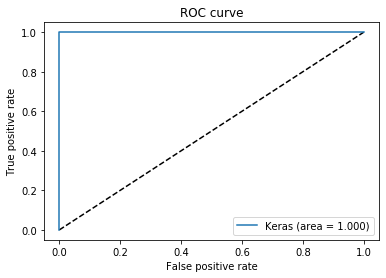

In [31]:
# Evaluate (ROC curve)

y_pred_keras = clf.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [32]:
# get the accuracy
predicted = clf.predict(X_test)

print (accuracy_score(y_test, predicted))

1.0


In [34]:
# test no samples in particular

import cv2 as cv2
test_path = "./FolderFrames/noPlotsTest"

# loop through the test images
#for file in glob.glob(test_path + "/*.jpg"):
for file in os.listdir(test_path):    

    file = test_path + "/" + file
    
    feature = get_features(file)
    feature = np.hstack([feature])
    prediction = clf.predict(feature.reshape(1,-1))

    if prediction:
        print("YES Kermit speaking:")
        
    else:
        print("NO Kermit not speaking:")
    print("-----------------------------------------------")

NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
-----------------------------------------------
NO Kermit not speaking:
----------------------------------------

In [35]:
# test yes samples 

import cv2 as cv2
test_path = "./FolderFrames/yesPlotsTest"

# loop through the test images
#for file in glob.glob(test_path + "/*.jpg"):
for file in os.listdir(test_path):    

    file = test_path + "/" + file
    
    feature = get_features(file)
    feature = np.hstack([feature])
    # predict label of test image
    prediction = clf.predict(feature.reshape(1,-1))

    if prediction:
        print("YES Kermit speaking:")
        
    else:
        print("NO Kermit not speaking:")
    print("-----------------------------------------------")

YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
YES Kermit speaking:
-----------------------------------------------
